In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import quantstats as qs
from sklearn.linear_model import LinearRegression

In [2]:
qqq_df = yf.Ticker("QQQ").history(start='2018-07-25', end='2023-07-13')
spy_df = yf.Ticker('SPY').history(start='2018-07-25', end='2023-07-13')
btc_df = yf.Ticker('BTC-USD').history(start='2018-07-25', end='2023-07-13')

In [3]:
balance_df = pd.read_csv('WALCL.csv')
balance_df.set_index('DATE', inplace=True)

TAG_df = pd.read_csv('WTREGEN.csv')
TAG_df.set_index('DATE', inplace=True)

repo_df = pd.read_csv('RRPONTSYD.csv')
repo_df.set_index('DATE', inplace=True)

In [4]:
df = pd.concat([balance_df, TAG_df, repo_df], ignore_index=False, axis=1)
# df.dropna(inplace=True)
df['WTREGEN'] *= 1000
df['RRPONTSYD'] *= 1000

In [5]:
df['Net'] = df['WALCL'] - df['WTREGEN'] - df['RRPONTSYD']

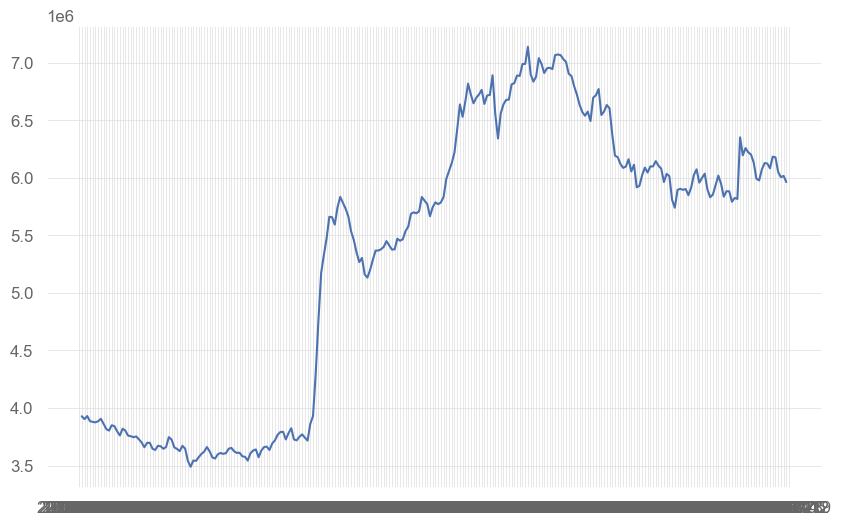

In [6]:
plt.plot(df['Net'])
plt.show()

In [7]:
df['QQQ_close'] = qqq_df['Close']
df['SPY_close'] = spy_df['Close']
df['BTC_close'] = btc_df['Close']

In [8]:
df.dropna(inplace=True)

In [9]:
df

,WALCL,WTREGEN,RRPONTSYD,Net,QQQ_close,SPY_close,BTC_close
DATE,,,,,,,
2018-07-25,4277681.0,348886.0,720.0,3928075.0,176.778320,261.009583,8181.390137
2018-08-01,4255653.0,351523.0,795.0,3903335.0,171.266678,258.114563,7624.910156
2018-08-08,4258030.0,326471.0,1659.0,3929900.0,176.004761,262.342102,6305.799805
2018-08-15,4228924.0,342799.0,315.0,3885810.0,173.306976,258.960175,6308.520020
2018-08-22,4228818.0,348393.0,1126.0,3879299.0,175.076477,262.994659,6376.709961
...,...,...,...,...,...,...,...
2023-06-14,8388323.0,102118.0,2109105.0,6177100.0,365.398773,435.562042,25124.675781
2023-06-21,8362060.0,276850.0,2037102.0,6048108.0,361.899994,434.940002,30027.296875
2023-06-28,8340914.0,390571.0,1945211.0,6005132.0,364.540009,436.390015,30086.246094


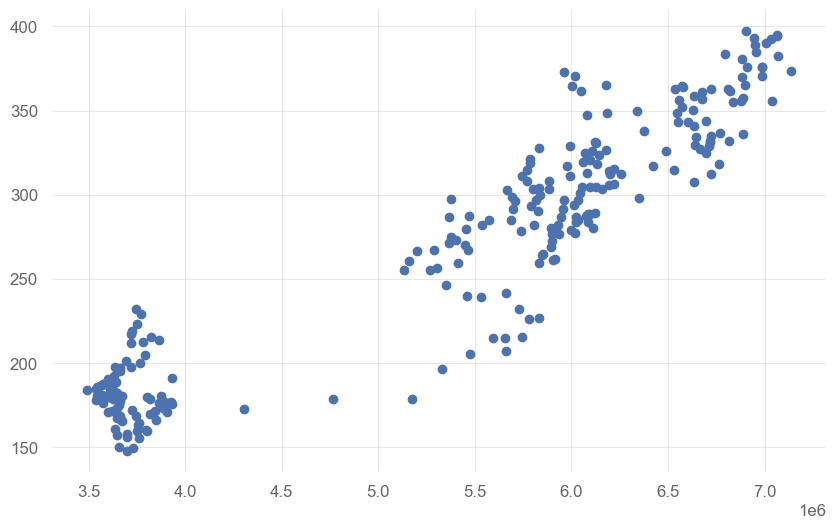

In [10]:
plt.scatter(df['Net'], df['QQQ_close'])

In [11]:
X = df['Net'].values.reshape(-1, 1)
y = df['QQQ_close'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
prediction = reg.predict(X)
residual = (y - prediction)

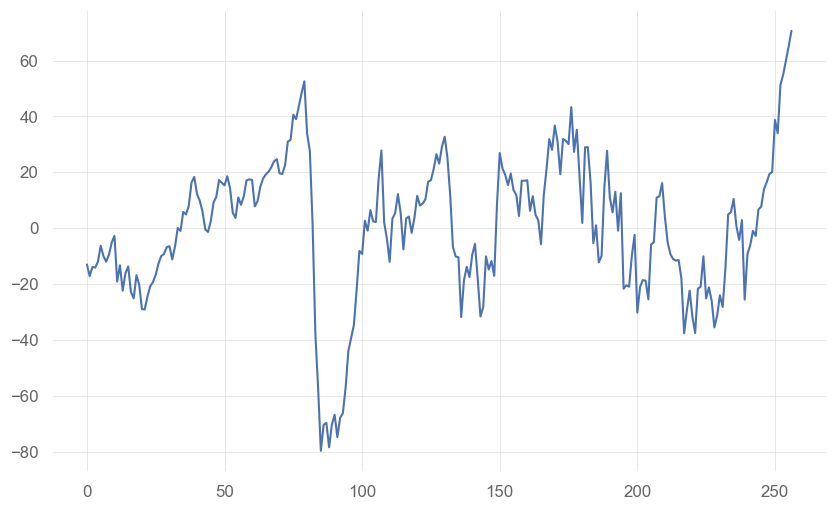

In [12]:
plt.plot(residual)

In [13]:
ratio_qqq = df['QQQ_close']/df['Net']

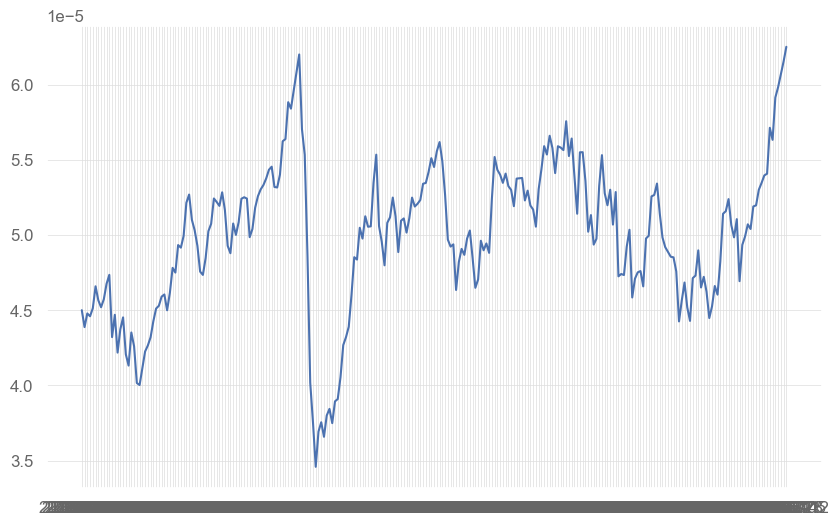

In [14]:
plt.plot(ratio_qqq)

In [15]:
df['Ratio_QQQ'] = ratio_qqq

<h1> Backtest

In [16]:
backtest_df = df[:len(df)//2]
forward_df = df[len(df)//2:]

In [17]:
df

,WALCL,WTREGEN,RRPONTSYD,Net,QQQ_close,SPY_close,BTC_close,Ratio_QQQ
DATE,,,,,,,,
2018-07-25,4277681.0,348886.0,720.0,3928075.0,176.778320,261.009583,8181.390137,0.000045
2018-08-01,4255653.0,351523.0,795.0,3903335.0,171.266678,258.114563,7624.910156,0.000044
2018-08-08,4258030.0,326471.0,1659.0,3929900.0,176.004761,262.342102,6305.799805,0.000045
2018-08-15,4228924.0,342799.0,315.0,3885810.0,173.306976,258.960175,6308.520020,0.000045
2018-08-22,4228818.0,348393.0,1126.0,3879299.0,175.076477,262.994659,6376.709961,0.000045
...,...,...,...,...,...,...,...,...
2023-06-14,8388323.0,102118.0,2109105.0,6177100.0,365.398773,435.562042,25124.675781,0.000059
2023-06-21,8362060.0,276850.0,2037102.0,6048108.0,361.899994,434.940002,30027.296875,0.000060
2023-06-28,8340914.0,390571.0,1945211.0,6005132.0,364.540009,436.390015,30086.246094,0.000061


In [29]:
def Fred_strategy(df, x, y):
    
    initial_capital = 100000
    lot = 0
    last_realized_capital = initial_capital
    unrealized_pnl = 0
    equity =  last_realized_capital + unrealized_pnl
    open_price = 0
    equity_list = []
    open_date = []
    close_date = []
    
    for date, row in df.iterrows():
        
        unrealized_pnl = (row['SPY_close']-open_price)*lot
        equity =  last_realized_capital + unrealized_pnl
        
        if row['Ratio_QQQ'] <= x:
            
            if lot == 0:
                open_price = row['SPY_close']
                lot = last_realized_capital // row['SPY_close']
                open_date.append(date)

            elif lot < 0:
                close_price = row['SPY_close']
                realized_pnl = unrealized_pnl
                last_realized_capital += realized_pnl
                close_date.append(date)

                open_price = row['SPY_close']
                lot = last_realized_capital // open_price
                open_date.append(date)


        elif row['Ratio_QQQ'] >= y:
            
            if lot > 0:
                close_price = row['SPY_close']
                realized_pnl = unrealized_pnl
                last_realized_capital += realized_pnl
                lot = 0
                close_date.append(date)
                
                open_price = row['SPY_close']
                lot = -last_realized_capital // open_price
                open_date.append(date)
                
            elif lot == 0:
                open_price = row['SPY_close']
                lot = -last_realized_capital // open_price
                open_date.append(date)
        
        equity_list.append(equity)
    
    return open_date, close_date, equity_list

In [23]:
open_date, close_date, equity_list = Fred_strategy(forward_df, 4.4e-5, 5.6e-5)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2021-01-27  2021-01-27
End Period                 2023-07-12  2023-07-12
Risk-Free Rate             0.0%        0.0%
Time in Market             98.0%       100.0%

Cumulative Return          -13.78%     18.49%
CAGR﹪                     -5.86%      7.15%

Sharpe                     -0.32       0.9
Prob. Sharpe Ratio         41.16%      73.66%
Smart Sharpe               -0.3        0.87
Sortino                    -0.5        1.22
Smart Sortino              -0.48       1.18
Sortino/√2                 -0.35       0.87
Smart Sortino/√2           -0.34       0.83
Omega                      0.95        0.95

Max Drawdown               -28.71%     -34.75%
Longest DD Days            427         553
Volatility (ann.)          51.14%      51.39%
R^2                        0.95        0.95
Information Ratio          -0.04       -0.04
Calmar                     -0.2        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-01-04,2023-07-12,2023-07-12,189,-28.711876,-28.069209
2,2021-03-10,2021-12-29,2022-05-11,427,-26.544225,-25.851509
3,2022-06-29,2022-08-17,2022-09-28,91,-12.631796,-11.955558
4,2022-10-19,2022-11-30,2022-12-28,70,-7.764368,-6.616152
5,2022-05-25,2022-06-08,2022-06-15,21,-4.467122,-4.023106


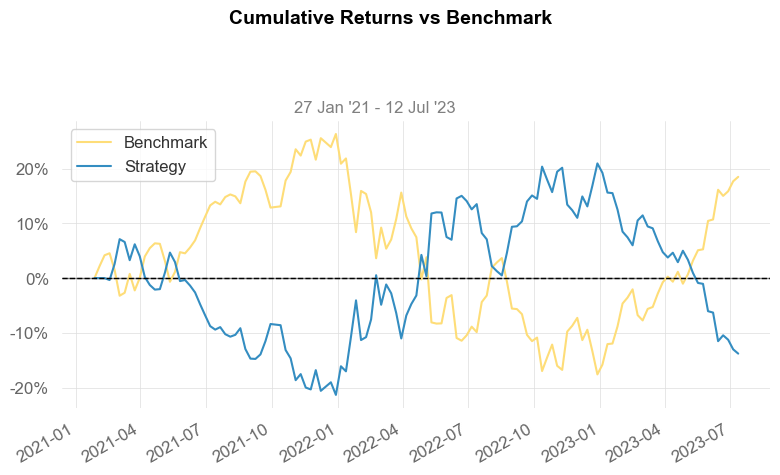

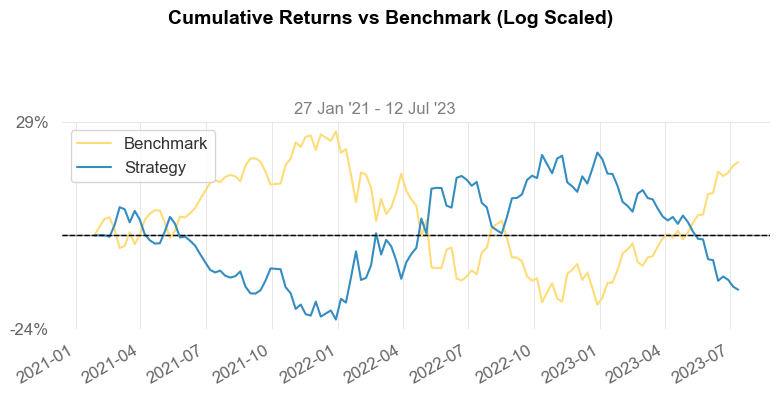

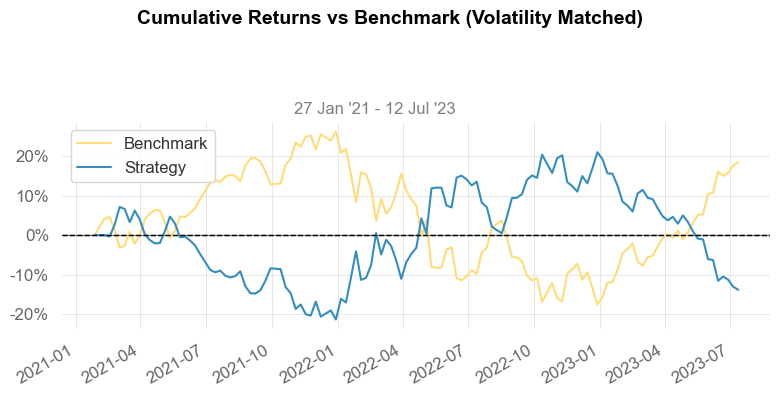

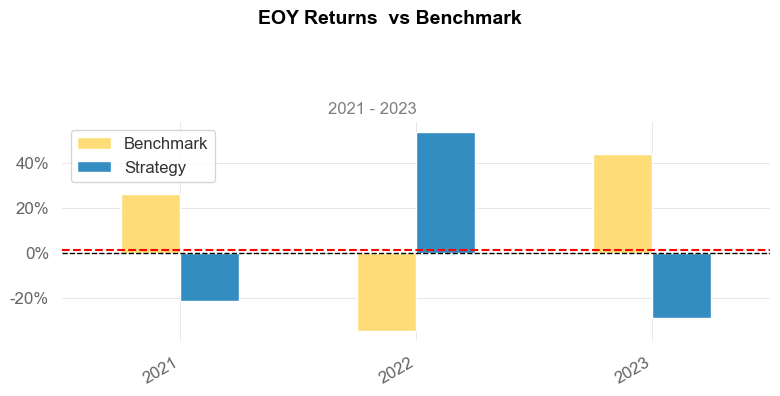

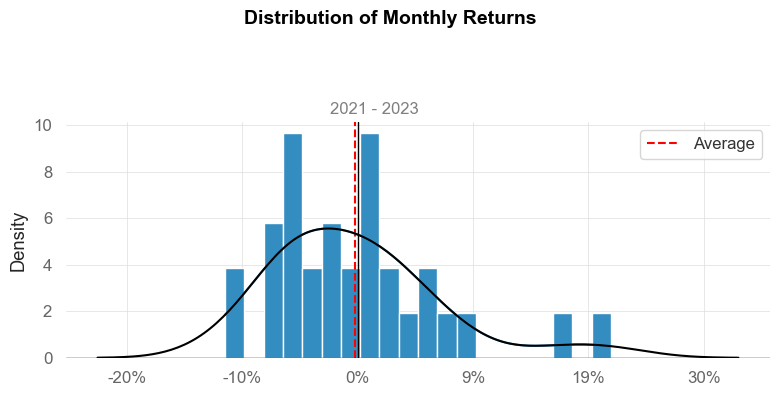

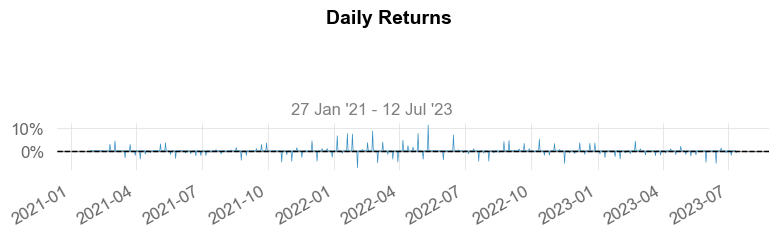

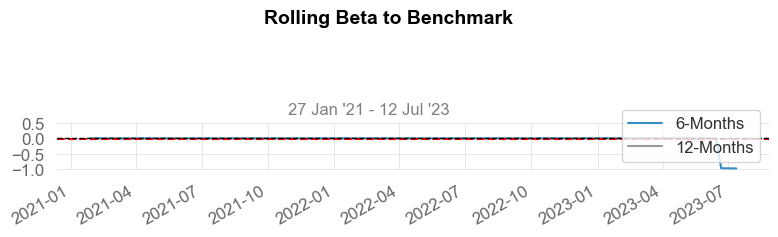

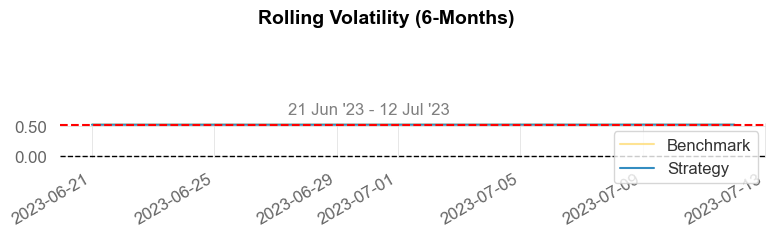

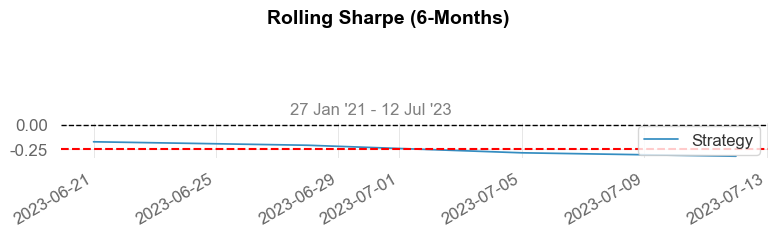

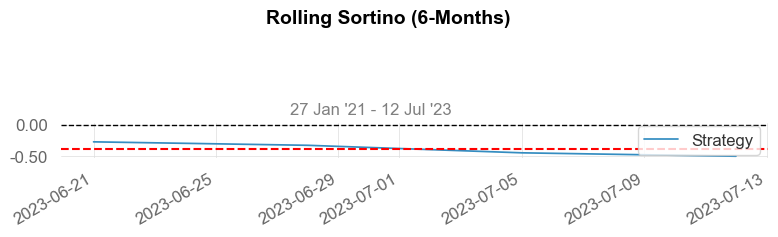

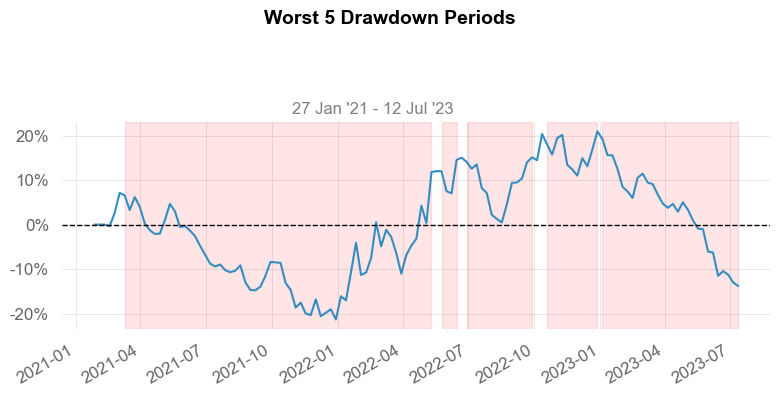

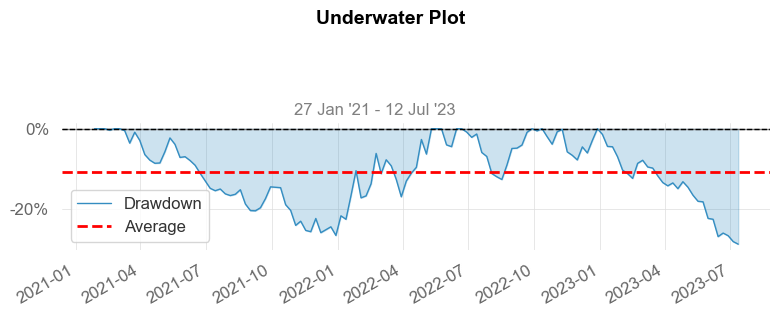

/opt/anaconda3/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


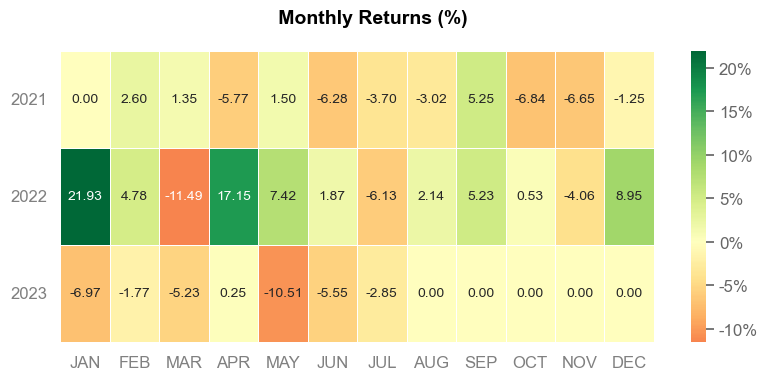

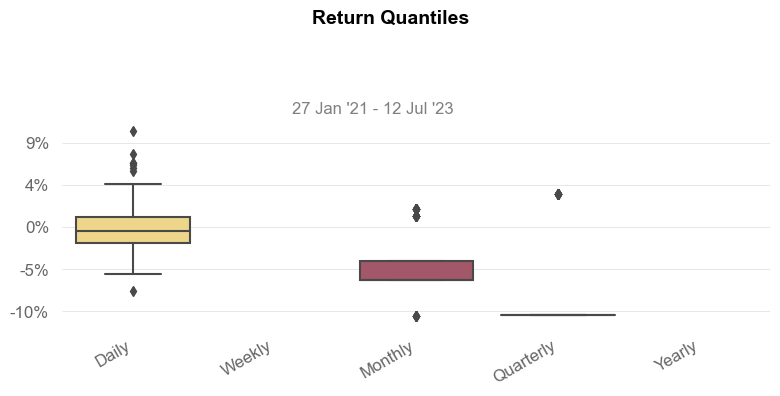

In [26]:
forward_df.index = pd.to_datetime(forward_df.index)
forward_df.index = forward_df.index.tz_localize(None)

benchmark = qs.utils.download_returns('QQQ')
benchmark.index = benchmark.index.tz_localize(None)

qs.reports.full(pd.Series(equity_list, index=forward_df.index), benchmark=benchmark)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-07-25  2018-07-25
End Period                 2021-01-20  2021-01-20
Risk-Free Rate             0.0%        0.0%
Time in Market             86.0%       100.0%

Cumulative Return          102.21%     41.76%
CAGR﹪                     32.64%      15.02%

Sharpe                     3.49        1.73
Prob. Sharpe Ratio         99.88%      87.35%
Smart Sharpe               2.8         1.39
Sortino                    7.85        2.29
Smart Sortino              6.3         1.84
Sortino/√2                 5.55        1.62
Smart Sortino/√2           4.46        1.3
Omega                      2.01        2.01

Max Drawdown               -16.14%     -29.07%
Longest DD Days            112         189
Volatility (ann.)          42.22%      46.06%
R^2                        0.01        0.01
Information Ratio          0.07        0.07
Calmar                     2.02        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-09-30,2021-01-20,2021-01-20,112,-16.143432,-15.086442
2,2018-12-12,2018-12-26,2019-02-13,63,-9.802573,-8.478337
3,2019-11-27,2020-02-19,2020-03-11,105,-9.415748,-9.117983
4,2019-07-31,2019-08-14,2019-10-30,91,-5.809736,-4.461645
5,2019-05-01,2019-05-29,2019-06-19,49,-4.769407,-3.167099


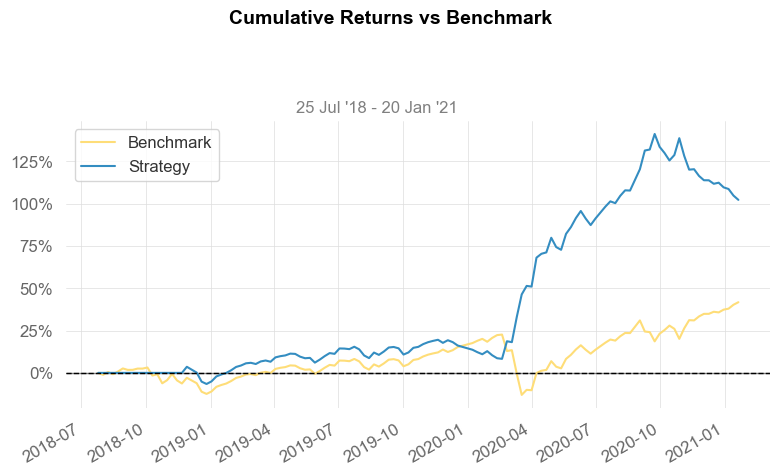

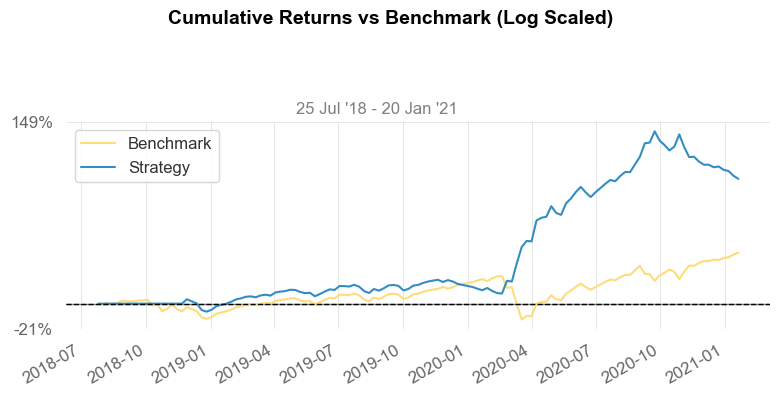

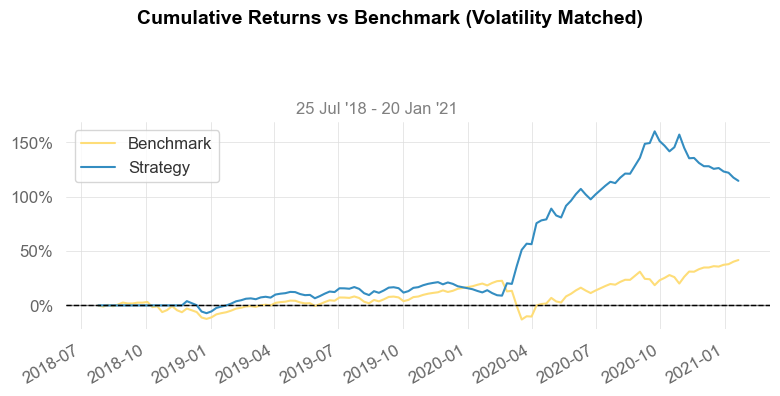

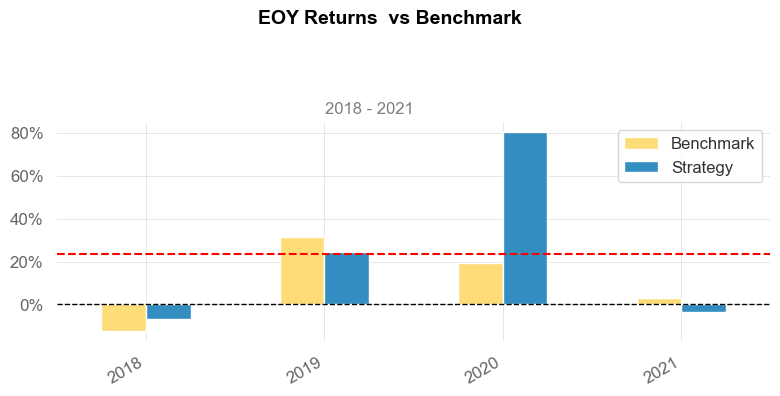

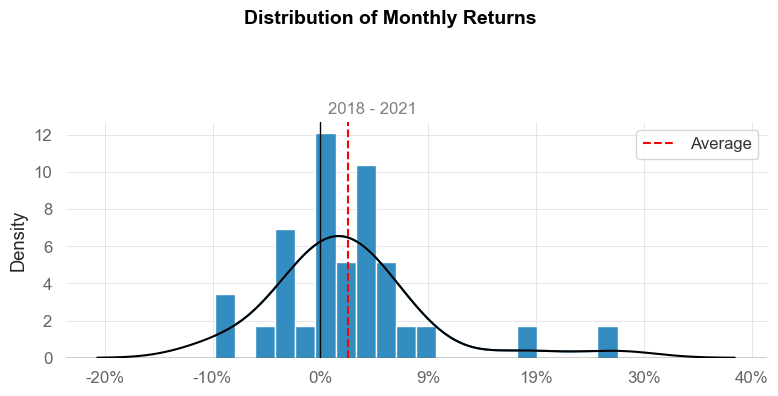

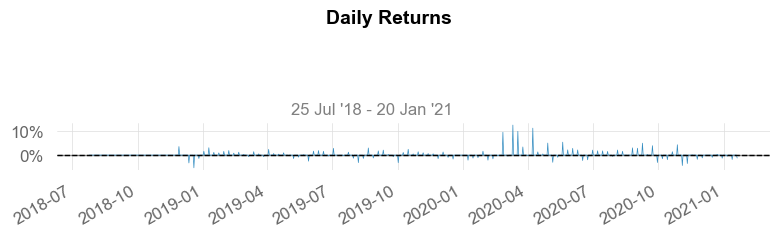

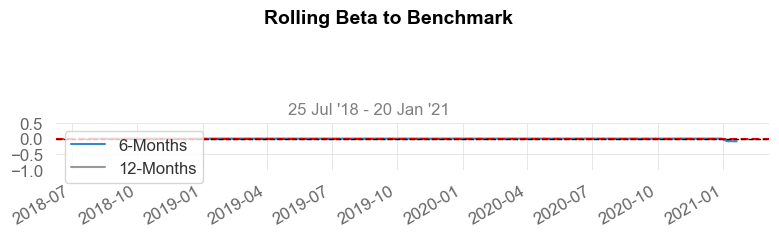

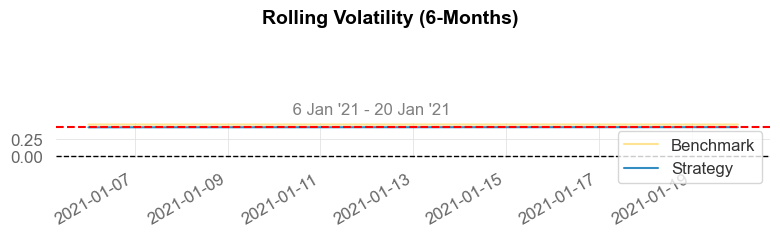

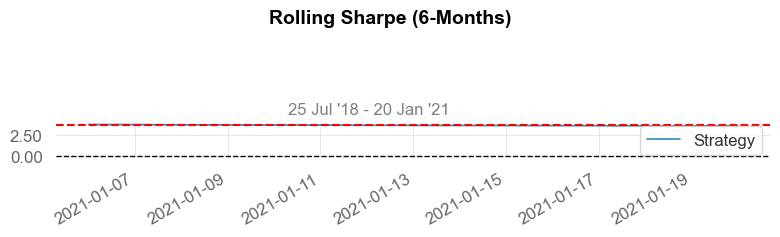

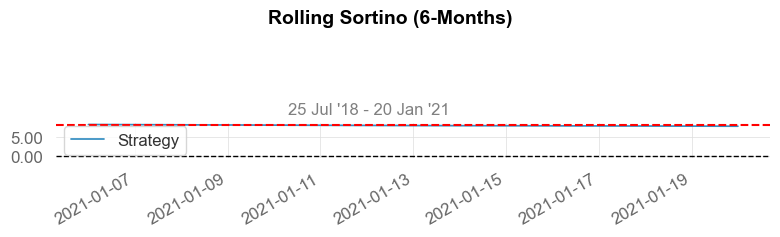

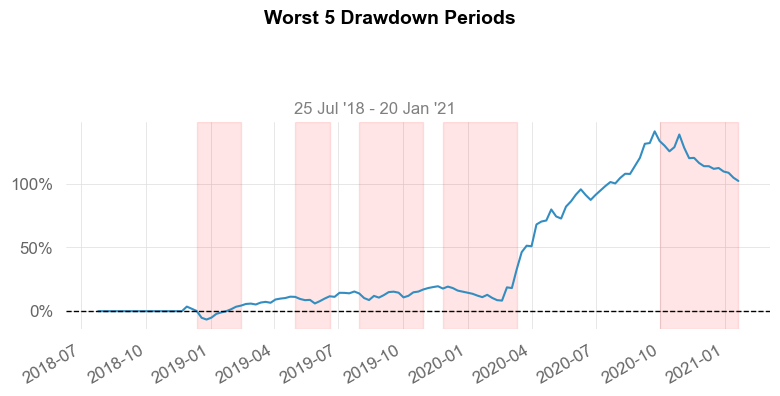

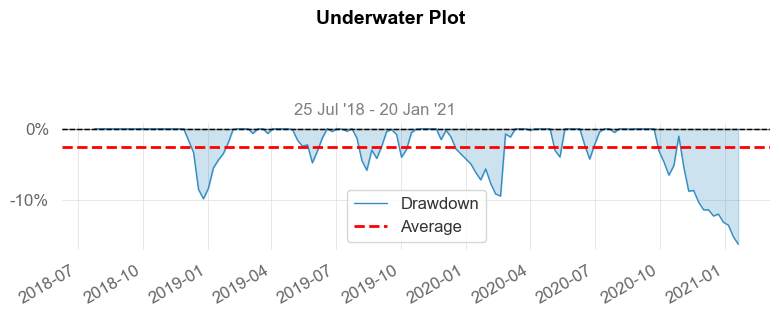

/opt/anaconda3/lib/python3.9/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


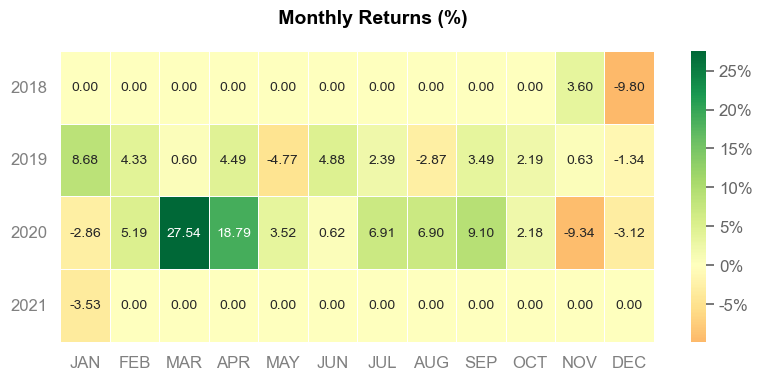

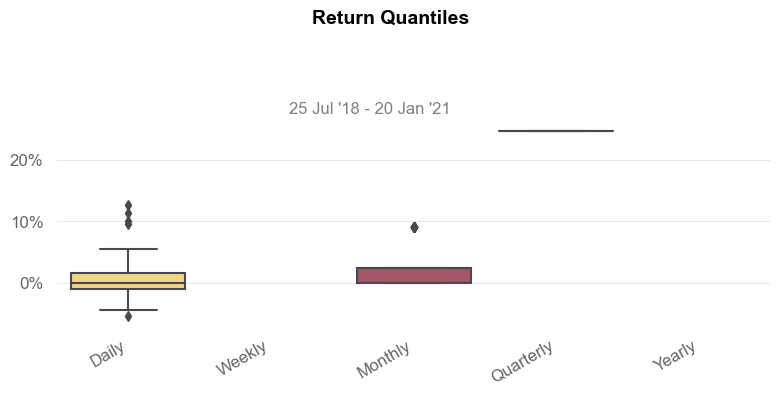

In [31]:
open_date, close_date, equity_list = Fred_strategy(backtest_df, 4.2e-5, 5.4e-5)

backtest_df.index = pd.to_datetime(backtest_df.index)
backtest_df.index = backtest_df.index.tz_localize(None)

benchmark = qs.utils.download_returns('SPY')
benchmark.index = benchmark.index.tz_localize(None)

qs.reports.full(pd.Series(equity_list, index=backtest_df.index), benchmark=benchmark)

Text(0.5, 1.0, 'Sharpe_ratio')

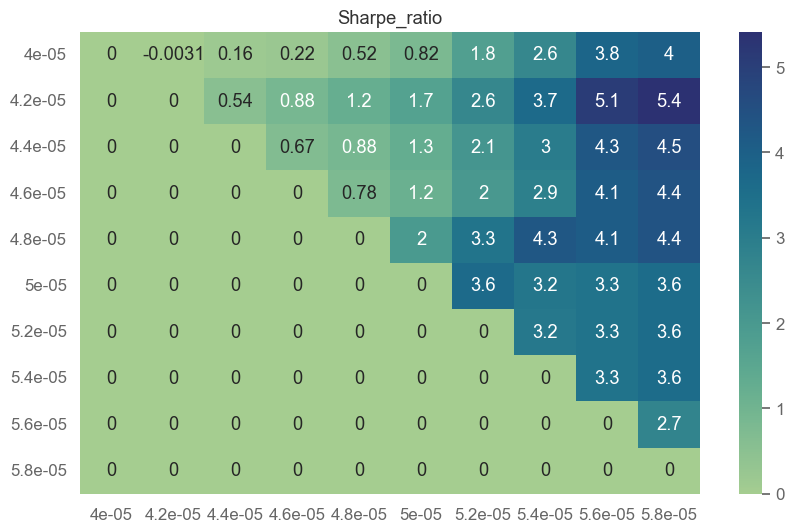

In [83]:
x_list = np.array(range(40, 60,  2))/1000000
y_list = np.array(range(40, 60, 2))/1000000

result_dict = {}

for x in x_list:
    for y in y_list:
        if x < y:
            open_date, close_date, equity_list = Fred_strategy(backtest_df, x, y)
            sharpe = qs.stats.sharpe(pd.Series(equity_list))
        else: 
            sharpe = np.nan
        
        result_dict.update({(x, y):float(sharpe)})

ser = pd.Series(list(result_dict.values()), index=pd.MultiIndex.from_tuples(result_dict.keys()))
sharpe  = ser.unstack().fillna(0)
sns.heatmap(sharpe, annot = True, cmap = "crest").set_title('Sharpe_ratio')

Text(0.5, 1.0, 'Sharpe_ratio')

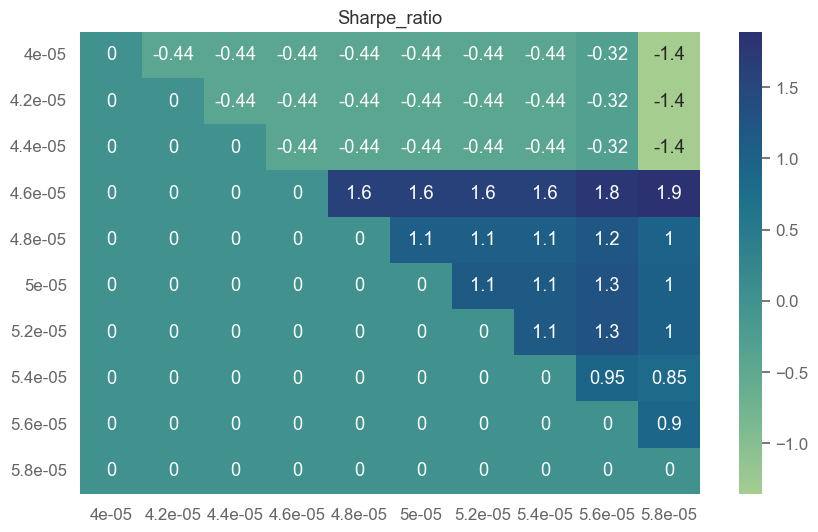

In [73]:
x_list = np.array(range(40, 60,  2))/1000000
y_list = np.array(range(40, 60, 2))/1000000

result_dict = {}

for x in x_list:
    for y in y_list:
        if x < y:
            open_date, close_date, equity_list = Fred_strategy(forward_df, x, y)
            sharpe = qs.stats.sharpe(pd.Series(equity_list))
        else: 
            sharpe = np.nan
        
        result_dict.update({(x, y):float(sharpe)})

ser = pd.Series(list(result_dict.values()), index=pd.MultiIndex.from_tuples(result_dict.keys()))
sharpe  = ser.unstack().fillna(0)
sns.heatmap(sharpe, annot = True, cmap = "crest").set_title('Sharpe_ratio')